In [955]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression 

In [956]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_train = pd.read_csv("titanic_train.csv")
titanic_gender = pd.read_csv("titanic_gender_submission.csv")

In [957]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [958]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [959]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [960]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [961]:
fare_drop = titanic_test.index[titanic_test["Fare"].isnull()] #find the Nulls in test for Fare, will need to drop for the titanic_gender df as well - otherwise different dimensions when comparing later
titanic_gender.drop(fare_drop, inplace=True)

In [962]:
titanic_train["Age"].fillna(titanic_train["Age"].mean().astype(int), inplace=True) #replace null values with a rounded mean
titanic_test["Age"].fillna(titanic_train["Age"].mean().astype(int), inplace=True)

In [963]:
#too many missing cabin values to warrant filling, and very few missing fare and embarked rows, so will drop the cabin column and fare row 
# passenger id and Name not help at this stage
titanic_train.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket"], inplace =True)
titanic_test.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket"], inplace =True)

In [964]:
titanic_test.dropna(inplace=True)
titanic_train.dropna(inplace=True)

In [965]:
titanic_train["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [966]:
titanic_test["Sex"].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

In [967]:
#convert the labels in sex to a binary dummy 1 or 0
sex_dummy =  {
    "male" : 0,
    "female" : 1
}
titanic_train['Sex'] = titanic_train['Sex'].map(sex_dummy)
titanic_test['Sex'] = titanic_test['Sex'].map(sex_dummy)


In [968]:
titanic_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64

In [969]:
titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [970]:
encoded_train = pd.get_dummies(titanic_train, columns=["Embarked", ])
encoded_test = pd.get_dummies(titanic_test, columns=["Embarked", ])

In [971]:
encoded_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,False,True,False
1,3,1,47.0,1,0,7.0000,False,False,True
2,2,0,62.0,0,0,9.6875,False,True,False
3,3,0,27.0,0,0,8.6625,False,False,True
4,3,1,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,0,0,8.0500,False,False,True
414,1,1,39.0,0,0,108.9000,True,False,False
415,3,0,38.5,0,0,7.2500,False,False,True
416,3,0,29.0,0,0,8.0500,False,False,True


In [972]:
encoded_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,False,True
887,1,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,1,29.0,1,2,23.4500,False,False,True
889,1,1,0,26.0,0,0,30.0000,True,False,False


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

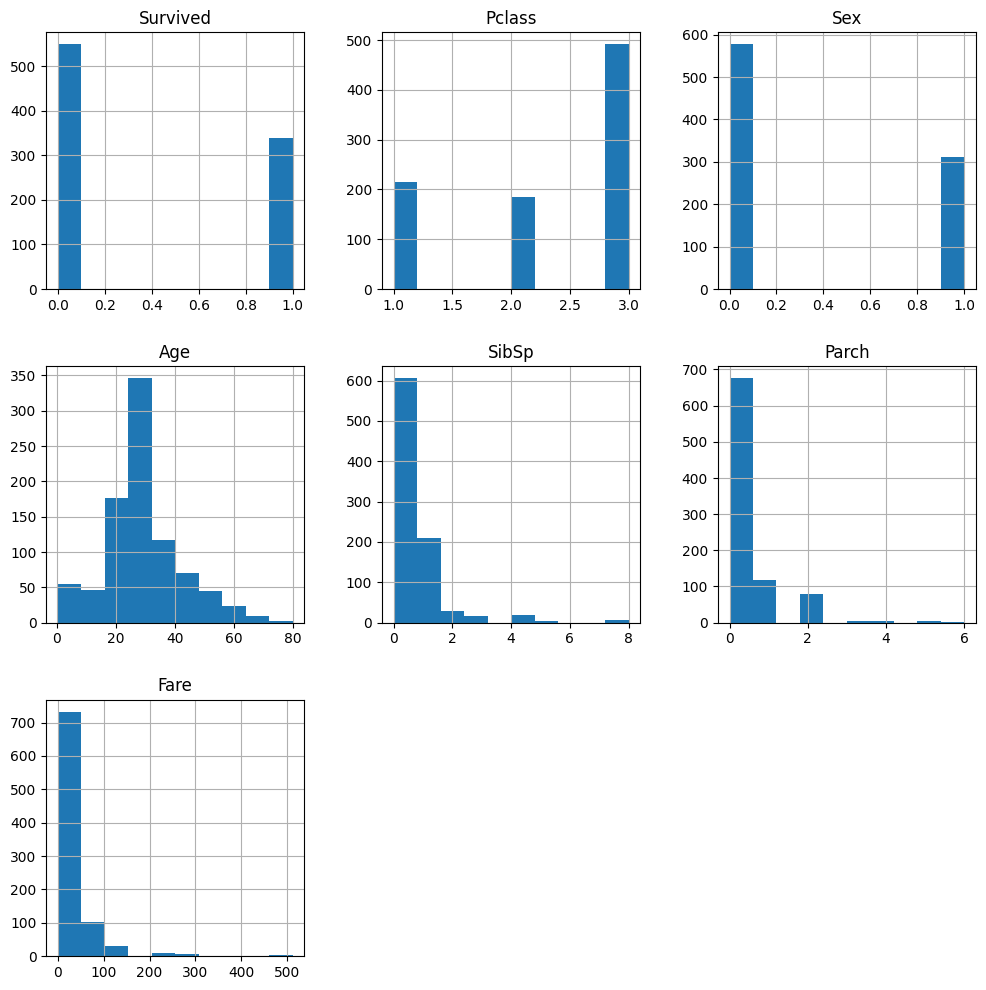

In [973]:
titanic_train.hist(figsize=(12,12))

In [974]:
titanic_train.skew(numeric_only=True)
#as we can see some paramters are slightly positively skewed - we could normalise them
# Likewise SibSp, Parch and Fare are all also highly positively skewed

Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         0.463711
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

<Axes: >

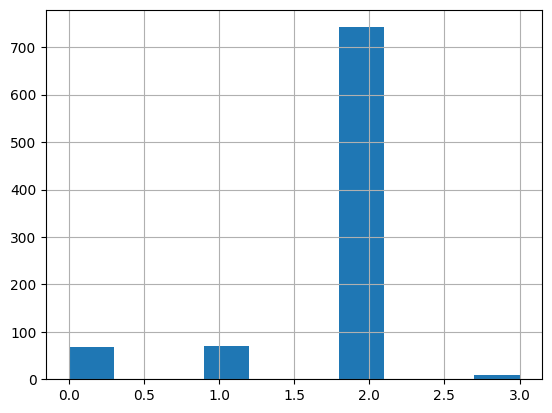

In [975]:
#Age might be interesting to bucket

titanic_train.loc[titanic_train["Age"] <= 12, "Age"] = 0 #child
titanic_train.loc[(titanic_train["Age"] > 12) & (titanic_train["Age"] <= 18), "Age"] = 1 #teen
titanic_train.loc[(titanic_train["Age"] > 18) & (titanic_train["Age"] <= 65), "Age"] = 2 #adult
titanic_train.loc[(titanic_train["Age"] > 65) & (titanic_train["Age"] <= 100), "Age"] = 3 #OAP

titanic_train["Age"].hist()

In [976]:
titanic_train["Age"].value_counts()

Age
2.0    742
1.0     70
0.0     69
3.0      8
Name: count, dtype: int64

In [977]:
#repeat for test set
titanic_test.loc[titanic_test["Age"] <= 12, "Age"] = 0 #child
titanic_test.loc[(titanic_test["Age"] > 12) & (titanic_test["Age"] <= 18), "Age"] = 1 #teen
titanic_test.loc[(titanic_test["Age"] > 18) & (titanic_test["Age"] <= 65), "Age"] = 2 #adult
titanic_test.loc[(titanic_test["Age"] > 65) & (titanic_test["Age"] <= 100), "Age"] = 3 #OAP

In [978]:
#label encode embarked for train
embarked = pd.DataFrame(titanic_train["Embarked"])
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output= False)
ohe_transform = ohe.fit_transform(embarked)
ohe_df = pd.DataFrame(ohe_transform, columns = ohe.get_feature_names_out(["Embarked"]))
train_df = pd.concat([titanic_train.reset_index(), ohe_df.reset_index()], axis = 1)
train_df.drop(columns=["Embarked"], inplace= True)
train_df.drop(columns = "index", inplace=True)
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,2.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,1,2.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,1,2.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,1,2.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,0,2.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,0,2.0,0,0,13.0000,0.0,0.0,1.0
885,1,1,1,2.0,0,0,30.0000,0.0,0.0,1.0
886,0,3,1,2.0,1,2,23.4500,0.0,0.0,1.0
887,1,1,0,2.0,0,0,30.0000,1.0,0.0,0.0


In [979]:
#label encode embarked for test
embarked = pd.DataFrame(titanic_test["Embarked"])
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output= False)
ohe_transform = ohe.fit_transform(embarked)
ohe_df = pd.DataFrame(ohe_transform, columns = ohe.get_feature_names_out(["Embarked"]))
test_df = pd.concat([titanic_test.reset_index(), ohe_df.reset_index()], axis = 1)
test_df.drop(columns=["Embarked"], inplace= True)
test_df.drop(columns = "index", inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,2.0,0,0,7.8292,0.0,1.0,0.0
1,3,1,2.0,1,0,7.0000,0.0,0.0,1.0
2,2,0,2.0,0,0,9.6875,0.0,1.0,0.0
3,3,0,2.0,0,0,8.6625,0.0,0.0,1.0
4,3,1,2.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
412,3,0,2.0,0,0,8.0500,0.0,0.0,1.0
413,1,1,2.0,0,0,108.9000,1.0,0.0,0.0
414,3,0,2.0,0,0,7.2500,0.0,0.0,1.0
415,3,0,2.0,0,0,8.0500,0.0,0.0,1.0


In [980]:
#robust scaler for Fare in train set
rscaler = RobustScaler()
fare = pd.DataFrame(titanic_train.iloc[:, 6])
rscaled_fare = rscaler.fit_transform(fare)
rscaled_fare = pd.DataFrame(rscaled_fare, columns=  ["Scaled_Fare"])
train_df = pd.concat([train_df.reset_index(), rscaled_fare.reset_index()], axis = 1)
train_df.drop(columns=["Fare"], inplace= True)
train_df.drop(columns = "index", inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Scaled_Fare
0,0,3,0,2.0,1,0,0.0,0.0,1.0,-0.311813
1,1,1,1,2.0,1,0,1.0,0.0,0.0,2.459687
2,1,3,1,2.0,0,0,0.0,0.0,1.0,-0.282598
3,1,1,1,2.0,1,0,0.0,0.0,1.0,1.672674
4,0,3,0,2.0,0,0,0.0,0.0,1.0,-0.277188
...,...,...,...,...,...,...,...,...,...,...
884,0,2,0,2.0,0,0,0.0,0.0,1.0,-0.062941
885,1,1,1,2.0,0,0,0.0,0.0,1.0,0.672856
886,0,3,1,2.0,1,2,0.0,0.0,1.0,0.389358
887,1,1,0,2.0,0,0,1.0,0.0,0.0,0.672856


In [981]:
# scaling Fare in test dataset
fare = pd.DataFrame(titanic_test.iloc[:, 5])
rscaled_fare = rscaler.fit_transform(fare)
rscaled_fare = pd.DataFrame(rscaled_fare, columns=  ["Scaled_Fare"])
test_df = pd.concat([test_df.reset_index(), rscaled_fare.reset_index()], axis = 1)
test_df.drop(columns=["Fare"], inplace= True)
test_df.drop(columns = "index", inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Scaled_Fare
0,3,0,2.0,0,0,0.0,1.0,0.0,-0.280670
1,3,1,2.0,1,0,0.0,0.0,1.0,-0.315800
2,2,0,2.0,0,0,0.0,1.0,0.0,-0.201943
3,3,0,2.0,0,0,0.0,0.0,1.0,-0.245367
4,3,1,2.0,1,1,0.0,0.0,1.0,-0.091793
...,...,...,...,...,...,...,...,...,...
412,3,0,2.0,0,0,0.0,0.0,1.0,-0.271316
413,1,1,2.0,0,0,1.0,0.0,0.0,4.001229
414,3,0,2.0,0,0,0.0,0.0,1.0,-0.305208
415,3,0,2.0,0,0,0.0,0.0,1.0,-0.271316


In [982]:
#selecting the variables of interest
y_train = train_df.iloc[:, 0]
X_train = train_df.iloc[:, 1:]
X_test = test_df[:]


In [983]:
LR = LogisticRegression(max_iter=300)

In [984]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [985]:
y_pred = LR.predict(test_df)

In [986]:
y_test = titanic_gender[:]

In [987]:
y_test = titanic_gender.iloc[:,1]
result_log = {"Actual candy type": y_test, "Pred candy typee": y_pred}
output = pd.DataFrame(result_log)
output

,Actual candy type,Pred candy typee
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [988]:
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9328537170263789


In [989]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy", metrics.accuracy_score(y_test, y_pred_knn))

KNN Accuracy 0.8273381294964028


In [990]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy(gini):", metrics.accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy(gini): 0.8465227817745803


In [991]:
clf_linear = svm.SVC(kernel = "linear")
clfsigmoid = svm.SVC(kernel = "sigmoid")
clfrbf = svm.SVC(kernel = "rbf")
clf_linear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [992]:
y_pred_linear = clf_linear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [993]:
print("Accuracy(linear):", metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy(sigmoid):", metrics.accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy(rbf):", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy(linear): 1.0
Accuracy(sigmoid): 0.7889688249400479
Accuracy(rbf): 0.9496402877697842


In [994]:
#using a loop to print the models
model_list = [DecisionTreeClassifier(random_state=32), RandomForestClassifier(n_estimators=4, random_state=32), LogisticRegression(random_state=32), svm.SVC(random_state=32)]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")


DecisionTreeClassifier accuracy: 0.839

RandomForestClassifier accuracy: 0.856

LogisticRegression accuracy: 0.933

SVC accuracy: 0.950



(0.5, 1.0)

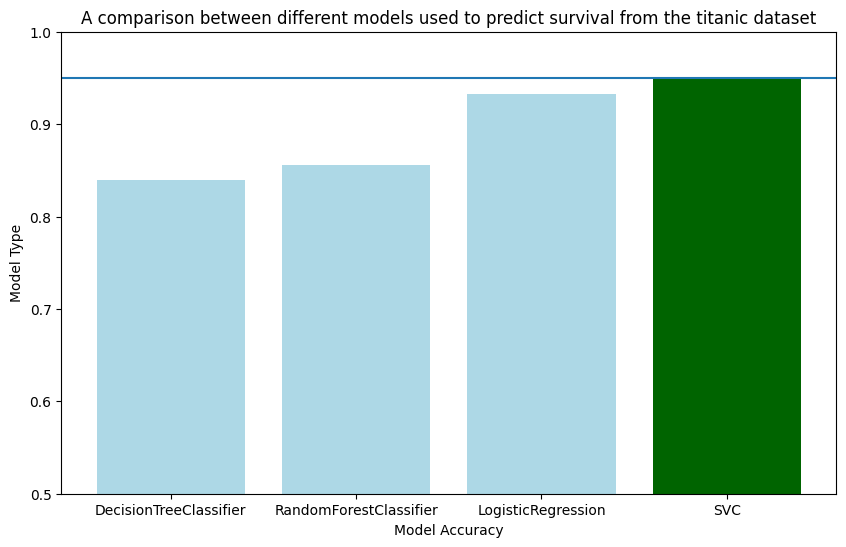

In [995]:
fig, ax=plt.subplots(figsize=(10,6))
plt.bar(x = model_name_list, height= model_accuracies, color = ["lightblue" if i < (max(model_accuracies)) else "darkgreen" for i in model_accuracies] )
plt.xlabel("Model Accuracy")
plt.ylabel("Model Type")
plt.axhline(max(model_accuracies))
plt.title("A comparison between different models used to predict survival from the titanic dataset")
plt.ylim(bottom = 0.5, top = 1)